<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Pablo Esteban Zúñiga Varela
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/PabloZV/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos`


## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [2]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

You should consider upgrading via the 'c:\users\polo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\polo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\polo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\polo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\polo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

'cada fila representa una cantidad de producto en alguna factura. Indica a qué factura corresponde (Innovice), qué producto es (StockCode), una descripcioón, cantidad en la factura, fecha de factura quén lo compró (Consumer ID), y desde qué país'

<Figure size 432x288 with 0 Axes>

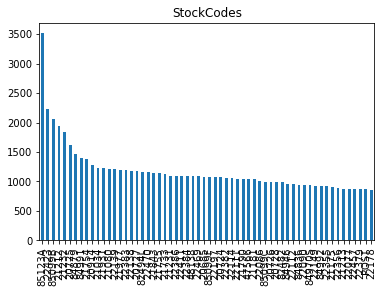

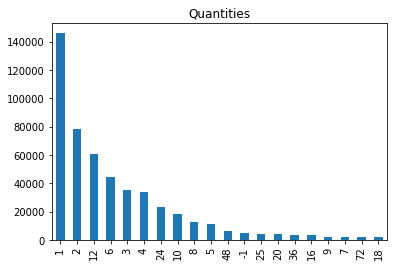

<Figure size 432x288 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
display(df_retail.head())
display(df_retail.describe())
display(df_retail.dtypes)
display('cada fila representa una cantidad de producto en alguna factura. Indica a qué factura corresponde (Innovice), qué producto es (StockCode), una descripcioón, cantidad en la factura, fecha de factura quén lo compró (Consumer ID), y desde qué país')
import matplotlib.pyplot as plt
plt.figure()
df_retail['StockCode'].value_counts()[:60].plot(kind='bar',title='StockCodes')
plt.figure()
df_retail['Quantity'].value_counts()[:20].plot(kind='bar',title='Quantities')
plt.figure()

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

Análisis univariado analiza la variable por si sola, sirve para entrender su comportamiento independientemente de las demás varibles
Análisis multivariado analiza la interacción entre variables, sirve apra entender el comportamiento de una variable en relación a otras
Análisis de datos faltantes sirve para identificar relaciones entre ausencia de datos y otras variables, identificar patrones de datos faltantes y posibilidad de llenarlos

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype

def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [7]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie Price:
    Se observa una distribución cargada a la izquierda, lo que podría ser modelado con una fucnión gamma donde el grueso de los datos están entre 0 y 8

In [9]:
profile_serie(df_retail['Invoice'])


## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Análisis de la serie Inovice
    Se observa que la mayoría de los datos corresponden a facturas que se repite entre 650 y 250 veces, se observa un decrecimeinto lineal de sus frecuencias al agruparlas de mayor a menor, dicho decrecimiento no guarda relación con el identificador de la factura

In [10]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object


    Análisis de la serie StockCode
    Se observa que la mayoría de las categorías de códigos está entre 1500 y 500, esto quiere decir que un mismo producto es vedido en total entre 1500 y 500 veces para este dataset, los primeros 6 elementos se repiten particualrmante más que dicho nivel. Finalmente destacar que el producto con stock code 85123A es el que más se repite pasando las 3500 ocurrencias.

In [11]:

profile_serie(df_retail['Description'])


## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object


    Análisis de la serie Description
    Se observa que las descripciones se repiten entre 1500 y 500 veces, la curva presenta una forma muy parecida a la de la serie StockCode. El elelemnto con la descripción más vendida es el WHITE HANGING HEART T-LIGHT HOLDER, que , dado el análisis de la curva StockCode, probablemente corresponde al elemento con StockCode 85123A

In [12]:

profile_serie(df_retail['Quantity'])


## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object


    Análisis de la serie Quantity
    Se observa que la gran mayoría de las compras se realizan en cantidades de 1 a 13, la curva parece como una suma de una distribución gamma (por su inclinación a la izquierda y partir del 0) con una normal (centrada entre 12 y 13 con mucha varianza, esto nos permtie modelar los núneros negativos también). Es extraño que haya cantidades negativas, puede deverse a devoluciones o errores, habría que [reguntar a quien facilita los datos.

In [13]:

profile_serie(df_retail['InvoiceDate'])


## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object


    Análisis de la serie InvoiceDate
    En una serie de tiempo es importante analizar estacionalidades. A simple vista no se observa una estacionalidad evidente para el tramo graficado, puede que haya estacionalidad pero en otro rango, por ejemplo en años. Se observa una concntración de compra en el mes de ocutbre y noviembre

In [14]:

profile_serie(df_retail['Customer ID'])


## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object


    Análisis de la serie Customer ID
    Se observa una acumulación de frecuencia de las primeras 3 sobre 3000, las siguientes 5 sobre 2000, las siguientes 16 sobre 1000 y luego baja linealmente la distribución manteniéndose la gran mayoría de los valores bajo 1000. Esta distribución no parece tener correalación con el número identificador de la categoría.

In [15]:

profile_serie(df_retail['Country'])


## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object


    Análisis de la serie Country
    Se observ que casi todas las ventas son en UK, un menor porcentaje es reparido entre EIRE, Germany, france y Netherlands. el resto de los paises tiene menos de 1300 pedidos asociados


### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

## Bivariant Analysis:

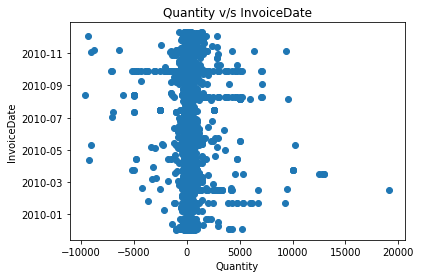

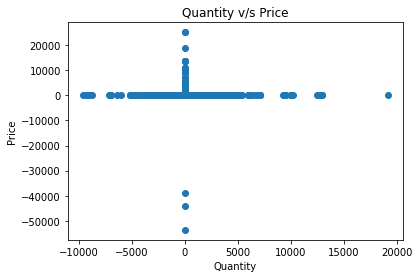

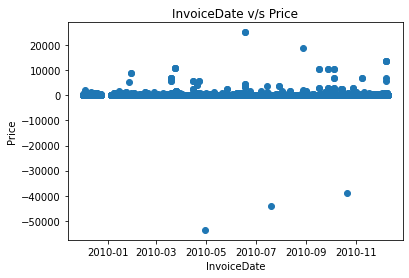

## Correlation:

## Missing Matrix:

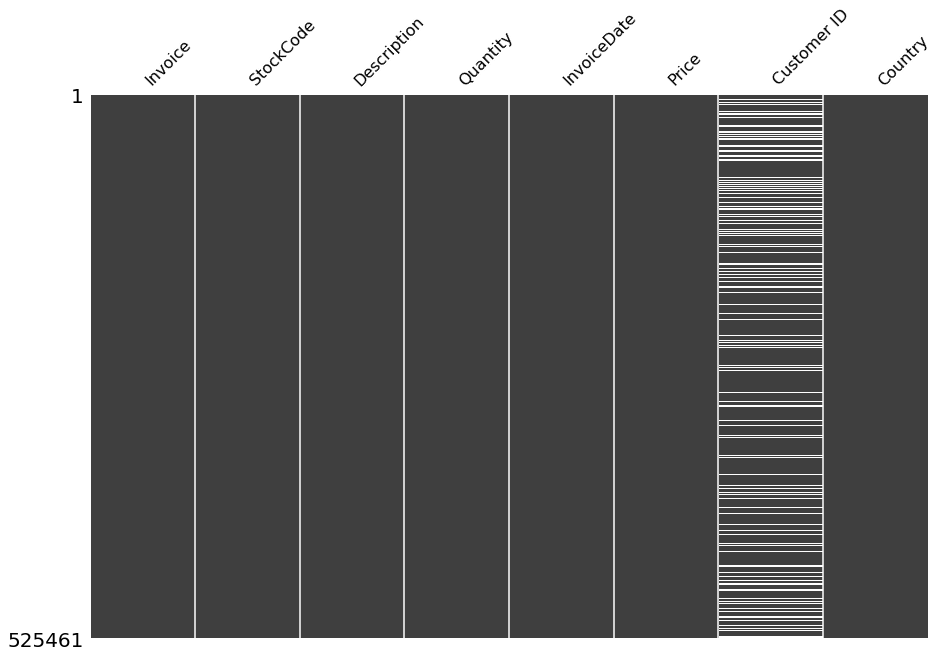

In [19]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)
    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

## Bivariant Analysis:

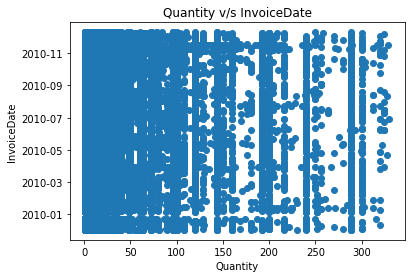

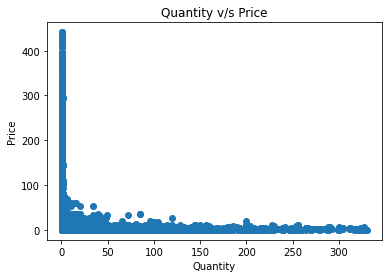

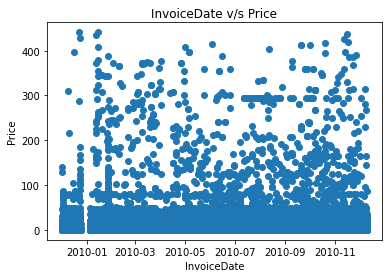

## Correlation:

## Missing Matrix:

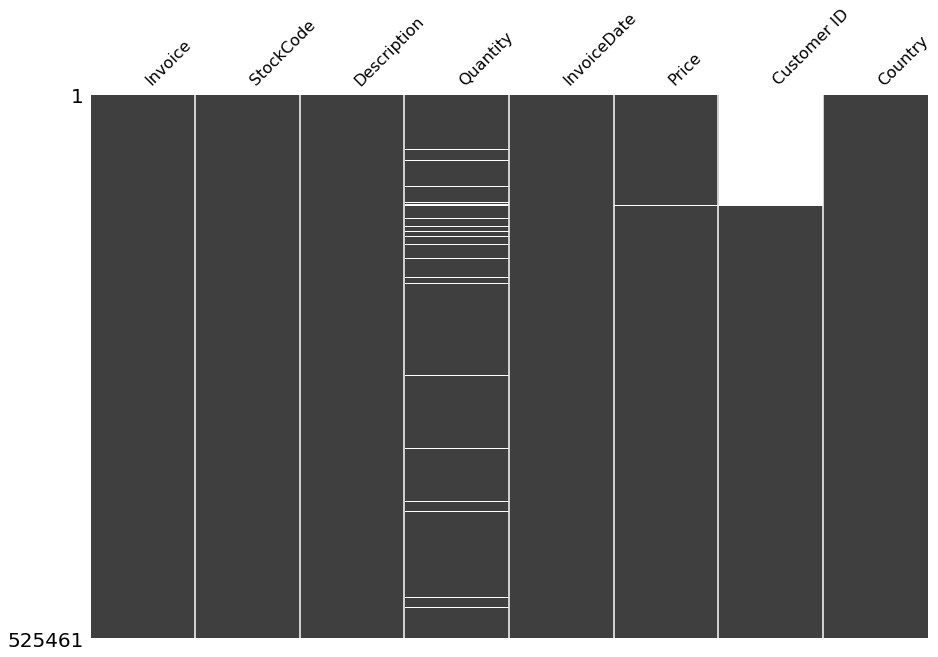

In [89]:
def limpiar_datos(df_input:pd.DataFrame)->pd.DataFrame:
    df = df_input.copy()
    for col in list(df.columns):
        if is_numeric_dtype(df[col]):
            # quitamos ouliers, consideramos outliers a los valores a un a distancia de 3 desviaciones estandar de la media
            df[col] = df[col].loc[(np.abs(stats.zscore(df[col])) < 3)]
            #eliminamos las cantidades negativas
            df[col] = df[col].loc[df[col]>=0]
    
    #juntamos los na
    df=df.sort_values(by=["Customer ID","StockCode"],na_position="first")
    return df
df_limpio = limpiar_datos(df_input=df_retail)

profile_df(df_limpio)



### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [120]:
#display(df_limpio.head(20))

def top30_ingreso_vs_cantidad(df_input:pd.core.frame.DataFrame):
    #obtiene los top 30 productos que generan mayores ingresos/cantidad (no se puede hablar de ganancias si no se tienen costos)
    df=df_input.copy()
    df["total_recaudado"]  = df["Price"]*df["Quantity"]
    df = pd.DataFrame(data=df,columns=["StockCode","Description","total_recaudado","Quantity"],copy=True)
    df = df.groupby(by=["StockCode","Description"],as_index=False).sum()
    df["ingresos/cantidades"] = df["total_recaudado"]/df["Quantity"]
    top_30 = df.sort_values(by=["ingresos/cantidades"],na_position="last",ascending=False).head(30)
    return top_30

def top30_ingresos(df_input:pd.core.frame.DataFrame):
    #obtiene los top 30 productos que generan mayores ingresos (no se puede hablar de ganancias si no se tienen costos)
    df=df_input.copy()
    df["total_recaudado"]  = df["Price"]*df["Quantity"]
    df = pd.DataFrame(data=df,columns=["StockCode","Description","total_recaudado","Quantity"],copy=True)
    df = df.groupby(by=["StockCode","Description"],as_index=False).sum()
    top_30 = df.sort_values(by=["total_recaudado"],na_position="last",ascending=False).head(30)
    return top_30

def top30_cantidades(df_input:pd.core.frame.DataFrame):
    #obtiene los top 30 productos que generan mayores cantidades
    df=df_input.copy()
    df = pd.DataFrame(data=df,columns=["StockCode","Description","Quantity"],copy=True)
    df = df.groupby(by=["StockCode","Description"],as_index=False).sum()
    top_30 = df.sort_values(by=["Quantity"],na_position="last",ascending=False).head(30)
    return top_30

df_top30_ingreso_vs_cantidad = top30_ingreso_vs_cantidad(df_input=df_limpio)
df_top30_ingresos = top30_ingresos(df_input=df_limpio)
df_top30_cantidades = top30_cantidades(df_input=df_limpio)
display(df_top30_cantidades)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1)

# mas_vendido_vs_mayores_ingresos = go.Figure(data=[
#     go.Bar(name='top30_ingresos', x=df_top30_ingresos["Description"], y=df_top30_ingresos["total_recaudado"]),
#     go.Bar(name='top30_cantidades', x=df_top30_cantidades["Description"], y=df_top30_cantidades["Quantity"]),
#     go.Bar(name='top30_ingreso_vs_cantidad', x=df_top30_ingreso_vs_cantidad["Description"], y=df_top30_ingreso_vs_cantidad["ingresos/cantidades"]),
# ])
mas_vendido_vs_mayores_ingresos = go.Figure(data=[
    go.Bar(name='top30_cantidades', x=df_top30_cantidades["Description"], y=df_top30_cantidades["Quantity"]),
    go.Bar(name='top30_ingreso_vs_cantidad', x=df_top30_ingreso_vs_cantidad["Description"], y=df_top30_ingreso_vs_cantidad["ingresos/cantidades"]),
])
fig.add_trace(go.Bar(name='top30_ingreso_vs_cantidad',x=df_top30_ingreso_vs_cantidad["Description"], y=df_top30_ingreso_vs_cantidad["ingresos/cantidades"]),1,1)
fig.add_trace(go.Bar(name='top30_ingresos', x=df_top30_ingresos["Description"], y=df_top30_ingresos["total_recaudado"]),2,1)
fig.add_trace(go.Bar(name='top30_cantidades',x=df_top30_cantidades["Description"], y=df_top30_cantidades["Quantity"]),3,1)
fig.show()

    
    

,StockCode,Description,Quantity
19430020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,51040.0
2559116,21212,PACK OF 72 RETRO SPOT CAKE CASES,38835.0
12529311,84879,ASSORTED COLOUR BIRD ORNAMENT,36676.0
12739869,84991,60 TEATIME FAIRY CAKE CASES,31942.0
11643961,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,31538.0
19357546,85099B,JUMBO BAG RED RETROSPOT,27888.0
2644715,21232,STRAWBERRY CERAMIC TRINKET BOX,27128.0
5677326,21977,PACK OF 60 PINK PAISLEY CAKE CASES,25100.0
12314700,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,19350.0
2563800,21213,PACK OF 72 SKULL CAKE CASES,19053.0


    Se observa que los valores con mayor ingreso/canidad son distintos a aquellos que se vendieron más y ambos son distintos a su vez de aquellos que generaron mayores ingresos

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [128]:
import plotly.express as px

def plot_ventas(dataframe):
    df=dataframe.copy()
    df=limpiar_datos(df)
    df["total_recaudado"]  = df["Price"]*df["Quantity"]
    df = pd.DataFrame(data=df,columns=["InvoiceDate","total_recaudado"],copy=True)
    df = df.groupby(by=["InvoiceDate"],as_index=False).sum()
    fig = px.line(df, x="InvoiceDate", y="total_recaudado", title="ventas")
    fig.update_traces(mode="markers+lines")
    fig.show()

plot_ventas(dataframe=df_retail)

    De los datos observados es posible observar gráficamente los días de mayor venta, ademásse observa una discontinuidad entre grupos de puntos, esto se debe a la nula venta durante la noche, los fines de semana y feriados.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>